# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

In [160]:
! git clone https://www.github.com/ali-rn/linearRegression

fatal: destination path 'linearRegression' already exists and is not an empty directory.


**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [162]:
path = '/content/linearRegression/data/Q1_clean.csv'

df = pd.read_csv(path)

df

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt
...,...,...,...,...,...
22148,90,100.0,Manhattan,Apartment,Entire home/apt
22149,65,80.0,Brooklyn,Apartment,Private room
22150,55,100.0,Brooklyn,Loft,Shared room
22151,60,100.0,Brooklyn,Apartment,Private room


1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.

In [163]:
df.loc[:,['Price','Neighbourhood '] ].groupby('Neighbourhood ').mean()

,Price
Neighbourhood,
Bronx,75.276498
Brooklyn,127.747378
Manhattan,183.664286
Queens,96.857233
Staten Island,146.166667


Manhattan is the most expensive on average

In [164]:
df.loc[:,['Review Scores Rating','Neighbourhood '] ].groupby('Neighbourhood ').mean()

,Review Scores Rating
Neighbourhood,
Bronx,91.654378
Brooklyn,92.363497
Manhattan,91.801496
Queens,91.549057
Staten Island,90.843750


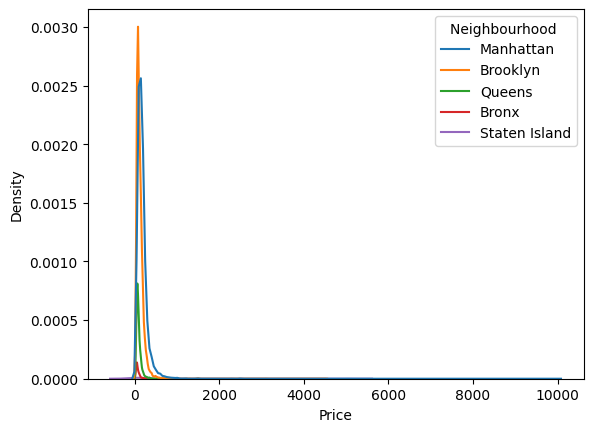

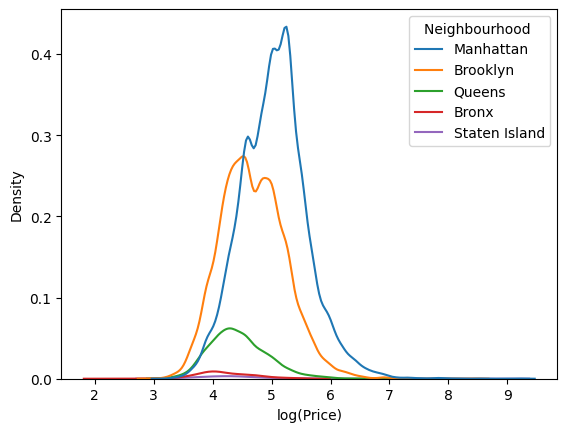

In [165]:
sns.kdeplot(x=df['Price'], hue=df['Neighbourhood '])
plt.show()

log = sns.kdeplot(x=np.log(df['Price']), hue=df['Neighbourhood '])
log.set(xlabel = 'log(Price)')
plt.show()

2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [166]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '])

reg = linear_model.LinearRegression(fit_intercept = False).fit(X, y) # Fit the linear model

print(reg.intercept_) # Intercept value
#print(reg.coef_) # Regression coefficients
#print(df['Neighbourhood '])
pd.DataFrame({'Neighborhood':reg.feature_names_in_, 'Coefficient': reg.coef_})
#print(reg.score(X, y)) # R squared measure

0.0


,Neighborhood,Coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


Regression coefficients and means are the same. Coefficients of regression on a single categorical variable are just averages (pooling together 1s and 0s).

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [167]:
X = pd.get_dummies(df['Neighbourhood '], drop_first = True)

reg = linear_model.LinearRegression().fit(X, y)

print(reg.intercept_)
pd.DataFrame({'Neighborhood':reg.feature_names_in_, 'Coefficient': reg.coef_})

75.27649769585331


,Neighborhood,Coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


One of the variables needed to get dropped to now have a baseline or starting point on the regression. All the coefficients are now average price differences between that neighborhood and the Bronx. The intercept should be added to display the averages.

In [168]:
pd.DataFrame({'Neighborhood':reg.feature_names_in_, 'Averages': reg.coef_ + reg.intercept_})

,Neighborhood,Averages
0,Brooklyn,127.747378
1,Manhattan,183.664286
2,Queens,96.857233
3,Staten Island,146.166667


4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [169]:
y = df['Price'] #output
X = df.loc[:,['Review Scores Rating', 'Neighbourhood '] ] #inputs
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'], pd.get_dummies(X_train['Neighbourhood '])], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], pd.get_dummies(X_test['Neighbourhood '])], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'Variable':reg.feature_names_in_, 'Coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.06701086106947296
RMSE:  125.01092061382933


,Variable,Coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


In [170]:
#RS * RS_coeff + price_coeff; price_coeff is just average price
percent = 100 #highest possible review
price_coeff = results.loc[3,'Coefficient'] #Manhattan
RS_coeff = results.loc[0,'Coefficient']

maxPrice = percent * RS_coeff + price_coeff
print(maxPrice)

192.64670789973746


The most expensive property is a 100-rating spot in Manhattan

5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [171]:
y = df['Price'] #output
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type'] ] #inputs
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'], pd.get_dummies(X_train['Neighbourhood ']), pd.get_dummies(X_train['Room Type'], dtype = 'int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], pd.get_dummies(X_test['Neighbourhood ']), pd.get_dummies(X_test['Room Type'], dtype = 'int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'Variable':reg.feature_names_in_, 'Coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.22035348129282306
RMSE:  114.27692123130633


,Variable,Coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


In [172]:
#percent * RS_coeff + prop_coeff + price_coeff; price_coeff is just average price, Prop_coeff
percent = 100
price_coeff = results.loc[3,'Coefficient'] #Manhattan
prop_coeff = results.loc[6, 'Coefficient'] #Entire home
RS_coeff = results.loc[0,'Coefficient']

maxPrice = percent * RS_coeff + price_coeff + prop_coeff
print(maxPrice)

227.00235089994416


The most expensive property is a 100-rating, entire apartment in Manhattan

6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

In part 5, there is an added property type variable that allows the regression model to explain the variance across more variables. Because of this wider distribution, the coefficient of Review Scores Rating is weighted less.

7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

In [173]:
path = '/content/linearRegression/data/cars_hw.csv'

cars = pd.read_csv(path)

cars

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000
...,...,...,...,...,...,...,...,...,...,...,...,...
971,972,Hyundai,2018,white,sedan,23869,1st,5,petrol,6-Speed,Automatic,956000
972,973,Hyundai,2019,white,sedan,14831,1st,5,petrol,6-Speed,Automatic,1027000
973,974,Hyundai,2014,silver,sedan,52846,1st,5,petrol,4-Speed,Automatic,736000
974,975,Ford,2020,white,crossover,28335,2nd,5,diesel,5-Speed,Automatic,749000


In [174]:
#log transform mileage and price
cars['Mileage_Run'] = cars['Mileage_Run'].apply(np.log)
cars['Price'] = cars['Price'].apply(np.log)

#make an age variable
cars['Age'] = max(cars['Make_Year']) - cars['Make_Year']

cars

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price,Age
0,1,Volkswagen,2017,silver,sedan,10.705736,1st,5,diesel,7-Speed,Automatic,13.395439,5
1,2,Hyundai,2016,red,crossover,9.918622,1st,5,petrol,5-Speed,Manual,13.432785,6
2,3,Honda,2019,white,suv,10.293501,2nd,5,petrol,5-Speed,Manual,13.583579,3
3,4,Renault,2017,bronze,hatchback,10.482346,1st,5,petrol,5-Speed,Manual,12.933621,5
4,5,Hyundai,2017,orange,hatchback,10.131658,1st,5,petrol,5-Speed,Manual,13.151922,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,972,Hyundai,2018,white,sedan,10.080336,1st,5,petrol,6-Speed,Automatic,13.770513,4
972,973,Hyundai,2019,white,sedan,9.604475,1st,5,petrol,6-Speed,Automatic,13.842152,3
973,974,Hyundai,2014,silver,sedan,10.875137,1st,5,petrol,4-Speed,Automatic,13.508985,8
974,975,Ford,2020,white,crossover,10.251853,2nd,5,diesel,5-Speed,Automatic,13.526494,2


2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?

In [175]:
#summarize price
cars['Price'].describe()

count    976.000000
mean      13.411033
std        0.450276
min       12.144197
25%       13.072647
50%       13.409795
75%       13.691080
max       14.894260
Name: Price, dtype: float64

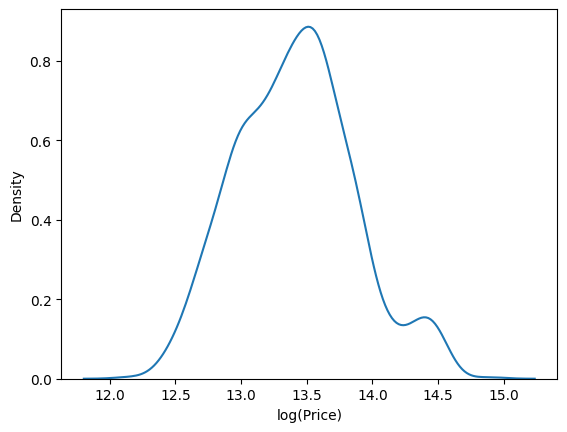

In [176]:
#kernel density of price
log = sns.kdeplot(x=cars['Price'])
log.set(xlabel = 'log(Price)')
plt.show()

In [177]:
#summarize by make
cars['Price'].groupby(cars['Make']).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,12.919895,0.480975,12.495004,12.568392,12.752286,13.171681,13.701221
Datsun,3.0,12.576047,0.036311,12.538967,12.558302,12.577636,12.594587,12.611538
Ford,52.0,13.468280,0.210895,12.577636,13.361380,13.469493,13.575984,13.879424
Honda,73.0,13.536318,0.336972,12.663497,13.272506,13.573439,13.726679,14.245343
Hyundai,305.0,13.368511,0.398781,12.421184,13.091904,13.366094,13.637579,14.370544
Jeep,4.0,14.216591,0.105084,14.070153,14.183270,14.240265,14.273586,14.315680
Kia,8.0,14.292177,0.076877,14.129591,14.272242,14.303105,14.349515,14.369970
MG Motors,35.0,14.439052,0.066263,14.278615,14.395744,14.429615,14.497597,14.518113
Mahindra,18.0,13.898953,0.159906,13.587354,13.851808,13.905680,13.961249,14.197366


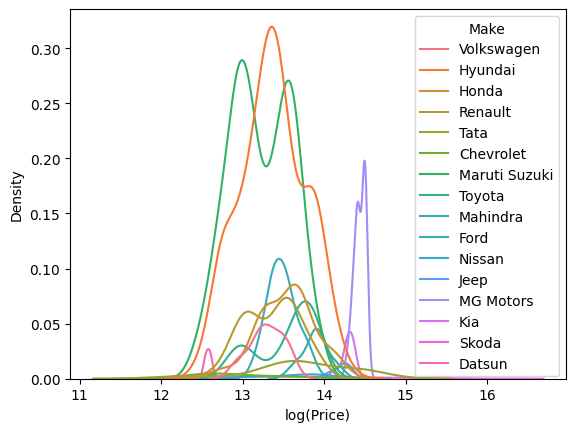

In [178]:
#kernel density of price grouped by make
log = sns.kdeplot(x=cars['Price'], hue = cars['Make'])
log.set(xlabel = 'log(Price)')
plt.show()

MG Motors cars are the most expensive, followed by Kia. Prices are generally in the 13-14 log(price) range.

3. Split the data into an 80% training set and a 20% testing set.

In [179]:
y = cars['Price'] #output
X = cars.loc[:,['Make',	'Make_Year', 'Color',	'Body_Type',	'Mileage_Run',	'No_of_Owners',	'Seating_Capacity',	'Fuel_Type', 'Transmission',	'Transmission_Type']] #inputs
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)

 4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?

In [180]:
#first model: numeric variables
y = cars['Price'] #output
X = cars.loc[:,['Age','Seating_Capacity', 'Mileage_Run'] ] #inputs
X_trainn, X_testn, y_trainn, y_testn = train_test_split(X,y, test_size=.2, random_state=100)

reg = linear_model.LinearRegression(fit_intercept=False).fit(X_trainn,y_trainn) # Run regression

y_hat = reg.predict(X_testn)
print('Rsq: ', reg.score(X_testn,y_testn)) # R2
rmse = np.sqrt( np.mean( (y_testn - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'Variable':reg.feature_names_in_, 'Coefficient': reg.coef_}) # Regression coefficients

Rsq:  -1.4469067973599947
RMSE:  0.6948271433515717


In [181]:
# second model: categorical variables
y = cars['Price'] # Output
X = cars[['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']] # Inputs
X_trainc, X_testc, y_trainc, y_testc = train_test_split(X, y, test_size=.2, random_state=100)

Z_trainc = pd.get_dummies(X_trainc)
Z_testc = pd.get_dummies(X_testc)

Z_trainc, Z_testc = Z_trainc.align(Z_testc, axis=1, fill_value=0)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_trainc, y_trainc)

y_hat = reg.predict(Z_testc)

print('Rsq:', reg.score(Z_testc, y_testc)) # R2
rmse = np.sqrt(np.mean((y_testc - y_hat)**2))
print('RMSE:', rmse) # Root Mean Squared Error

results = pd.DataFrame({'Variable': Z_trainc.columns, 'Coefficient': reg.coef_})

Rsq: 0.6840180343035425
RMSE: 0.2496888851862201


The second model with categorical variables performs better.

In [182]:
# third model: all variables
y = cars['Price'] # Output
X = cars[['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type','Age','Seating_Capacity','Mileage_Run']] # Inputs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)

Z_train = pd.concat([pd.get_dummies(X_train.iloc[:, 0:7]), X_train.iloc[:, 7:10]], axis=1)
Z_test = pd.concat([pd.get_dummies(X_test.iloc[:, 0:7]), X_test.iloc[:, 7:10]], axis=1)

Z_train, Z_test = Z_train.align(Z_test, axis=1, fill_value=0)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train, y_train)

y_hat = reg.predict(Z_test)

print('Rsq:', reg.score(Z_test, y_test)) # R2
rmse = np.sqrt(np.mean((y_test - y_hat)**2))
print('RMSE:', rmse) # Root Mean Squared Error

results = pd.DataFrame({'Variable': Z_train.columns, 'Coefficient': reg.coef_})

Rsq: 0.8333008391575649
RMSE: 0.18135718615603102


The combined model performs better than the other models by about 0.15 more than the categorical model

 5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?

In [183]:
from sklearn.preprocessing import PolynomialFeatures

for d in range(1, 5):
    expander = PolynomialFeatures(degree=d, include_bias=False)

    # Expand variables
    Z_train_expanded = expander.fit_transform(X_trainn)
    Z_test_expanded = expander.transform(X_testn)

    # Convert to DataFrame with appropriate column names
    names = expander.get_feature_names_out()
    X_train_expanded = pd.DataFrame(data=Z_train_expanded, columns=names)
    X_test_expanded = pd.DataFrame(data=Z_test_expanded, columns=names)

    # Reset indices for concatenating:
    X_train_expanded.reset_index(drop=True, inplace=True)
    X_trainc.reset_index(drop=True, inplace=True)
    X_train_all = pd.concat([X_train_expanded, pd.get_dummies(X_trainc)], axis=1, ignore_index=True)

    X_test_expanded.reset_index(drop=True, inplace=True)
    X_testc.reset_index(drop=True, inplace=True)
    X_test_all = pd.concat([X_test_expanded, pd.get_dummies(X_testc)], axis=1, ignore_index=True)

    # Drop NaN values from X_train_all and align everything
    X_train_all_cleaned = X_train_all.dropna()
    y_train_cleaned = y_train.iloc[X_train_all_cleaned.index]
    X_test_all_aligned = X_test_all.iloc[X_train_all_cleaned.index]  # Align X_test_all with X_train_all_cleaned
    y_test_aligned = y_test.iloc[X_train_all_cleaned.index]  # Align y_test with X_train_all_cleaned

    # Fitting linear regression model with cleaned and aligned features
    reg_all = linear_model.LinearRegression().fit(X_train_all_cleaned, y_train_cleaned)

    # Printing regression metrics
    print('\nPolynomial Degree:', d)
    print('Rsq:', reg_all.score(X_test_all_aligned, y_test_aligned)) # R2
    y_hat_all = reg_all.predict(X_test_all_aligned)
    rmse_all = np.sqrt(np.mean((y_test_aligned - y_hat_all)**2))
    print('RMSE:', rmse_all) # Root Mean Squared Error

IndexError: positional indexers are out-of-bounds

Had a lot of trouble getting the code for this section to work

6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

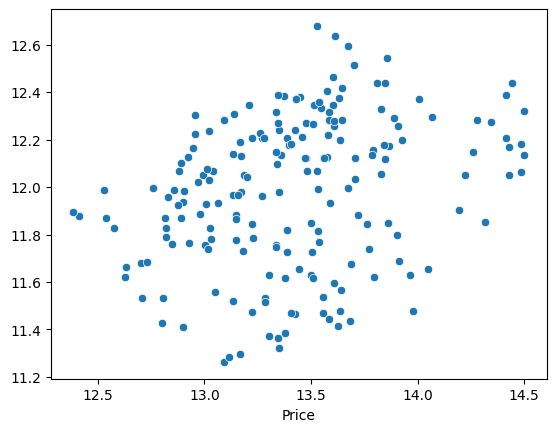

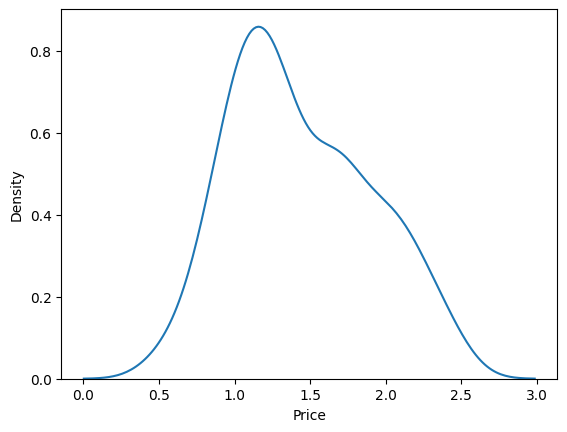

In [195]:
#using third model
y = cars['Price'] # Output
X = cars[['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type','Age','Seating_Capacity','Mileage_Run']] # Inputs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)

Z_train = pd.concat([pd.get_dummies(X_train.iloc[:, 0:7]), X_train.iloc[:, 7:10]], axis=1)
Z_test = pd.concat([pd.get_dummies(X_test.iloc[:, 0:7]), X_test.iloc[:, 7:10]], axis=1)

Z_train, Z_test = Z_train.align(Z_test, axis=1, fill_value=0)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train, y_train)

y_hat = reg.predict(Z_test)

results = pd.DataFrame({'Variable': Z_train.columns, 'Coefficient': reg.coef_})

residuals = y_test - y_hat_all

# Scatterplot:
sns.scatterplot(x=y_test,y=y_hat_all)
plt.show()

# KD plot
sns.kdeplot(x=residuals)
plt.show()

The model has a very light linear correlation of y=x. The residuals follow a bell-curve shape which shows that the data has consistent variance which is likely due to noise.

**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{3}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

**Q5.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?